# SARS-CoV-2 and MERS-CoV Mpro retrospective validation plots

Plotting the results of performing the retrospectove validation between SARS-CoV-2 and MERS-CoV. The data is obtained via the pipeline introduced in the paper and included in the `data/` folder.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.plot_results import (
    plot_affinity_compare, 
    plot_score_correlation, 
    plot_stacked_correlations,
    get_roc_curve
)

## Plot correlation between predicted and experimental affinities
We import the experimental and predicted IC50s from the data directory

In [3]:
mers_all = pd.read_csv("data/mers_pred_scores.csv")
sars_all = pd.read_csv("data/sars_pred_scores.csv")

df_mers_aff = mers_all.copy()
df_mers_aff["Affinity (kcal/mol)"] = np.log(10 ** (-df_mers_aff['MERS pIC50'])) * 0.5922
df_mers_aff = df_mers_aff.rename(columns={"MERS pIC50": "pIC50"})

df_sars_aff = sars_all.copy()
df_sars_aff["pIC50"] = df_sars_aff['SARS IC50 (µM)'].apply(lambda x: -np.log10(x * 10 ** (-6)))
df_sars_aff["Affinity (kcal/mol)"] = np.log(10 ** (-df_sars_aff['SARS IC50 (µM)'])) * 0.5922


mers_all_lt = pd.read_csv("data/mers_pred_scores_cdock.csv")
sars_all_lt = pd.read_csv("data/sars_pred_scores_cdock.csv")

df_mers_aff_lt = mers_all_lt.copy()
df_mers_aff_lt["Affinity (kcal/mol)"] = np.log(10 ** (-df_mers_aff_lt['MERS pIC50'])) * 0.5922
df_mers_aff_lt = df_mers_aff_lt.rename(columns={"MERS pIC50": "pIC50"})

df_sars_aff_lt = sars_all_lt.copy()
df_sars_aff_lt["pIC50"] = df_sars_aff_lt['SARS IC50 (µM)'].apply(lambda x: -np.log10(x * 10 ** (-6)))
df_sars_aff_lt["Affinity (kcal/mol)"] = np.log(10 ** (-df_sars_aff_lt['SARS IC50 (µM)'])) * 0.5922

### Correlation between scores

For ligand-transfer docking

/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:891: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:891: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


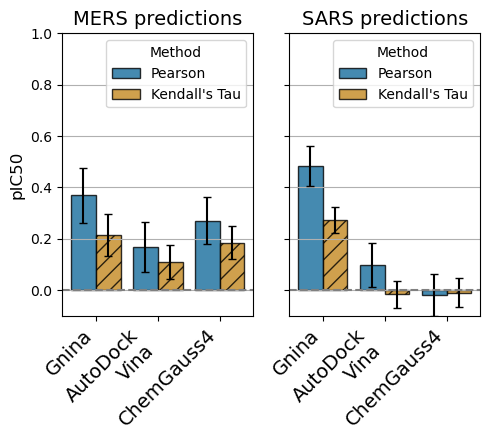

In [4]:
# MERS 
df_mers_aff_lt["gnina-pIC50"] = -np.log10(
            np.exp(-df_mers_aff_lt['CNN_dock_affinity'] / 0.5922)
        )
df_mers_aff_lt["vina-pIC50"] = -np.log10(
            np.exp(df_mers_aff_lt['Vina-score-min'] / 0.5922)
        )
df_mers_aff_lt["chemg-pIC50"] = -np.log10(
            np.exp(df_mers_aff_lt["docking-score-POSIT"] / 0.5922)
        )
df_mers_aff_pred_lt = df_mers_aff_lt[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50']] 
df_mers_aff_pred_lt = df_mers_aff_pred_lt.dropna().reset_index(drop=True)

df_mers_aff_pred_lt = df_mers_aff_pred_lt.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina', 
                                                    #'computed-SchNet-pIC50': 'SchNet',
                                                    'gnina-pIC50': 'Gnina'})

# SARS 
df_sars_aff_lt["gnina-pIC50"] = -np.log10(
            np.exp(-df_sars_aff_lt['CNN_dock_affinity'] / 0.5922)
        )
df_sars_aff_lt["vina-pIC50"] = -np.log10(
            np.exp(df_sars_aff_lt['Vina-score-min'] / 0.5922)
        )
df_sars_aff_lt["chemg-pIC50"] = -np.log10(
            np.exp(df_sars_aff_lt["docking-score-POSIT"] / 0.5922)
        )
df_sars_aff_pred_lt = df_sars_aff_lt[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50', ]]
df_sars_aff_pred_lt = df_sars_aff_pred_lt.dropna().reset_index(drop=True)
df_sars_aff_pred_lt = df_sars_aff_pred_lt.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina',                                                   
                                                    'gnina-pIC50': 'Gnina',})

# Plotting affinity correlation
fig, axs = plt.subplots(1, 2, figsize=(5,4.5), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
fig_mers, ax1 = plot_stacked_correlations(df_mers_aff_pred_lt, 'pIC50', title='MERS predictions', yrange=[-0.1, 1.], ax=axs[0],
                                    ylabel='pIC50', xlabel='', color_palette='colorblind', text_rotation=45)
for i, bar in enumerate(ax1.patches[3:]):
    bar.set_hatch('//')

fig_sars, ax2 = plot_stacked_correlations(df_sars_aff_pred_lt, 'pIC50', title='SARS predictions', yrange=[-0.1, 1.], ax=axs[1],
                                       ylabel='pIC50', xlabel='', color_palette='colorblind', text_rotation=45)

for i, bar in enumerate(ax2.patches[3:]):
    bar.set_hatch('//')

When docking all compounds

/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:805: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data=df_corr, x="feature", y="correlation",
/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:818: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:805: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data=df_corr, x="feature", y="correlation",
/Users/castelm3/Documents/Github/broad-spectrum-asap-paper/scripts/plot_results.py:818: UserWarn

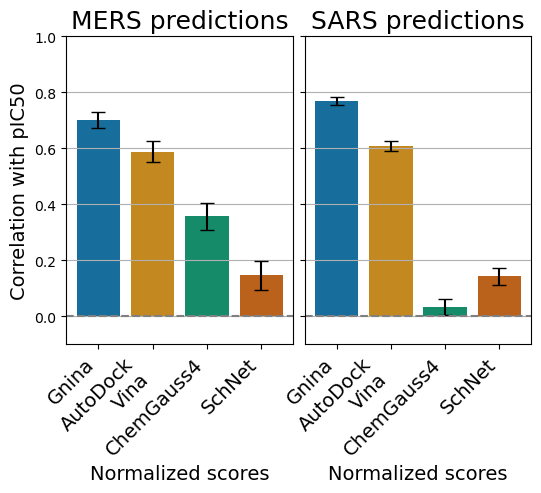

In [5]:
# MERS 
df_mers_aff["gnina-pIC50"] = -np.log10(
            np.exp(-df_mers_aff['CNN_dock_affinity'] / 0.5922)
        )
df_mers_aff["vina-pIC50"] = -np.log10(
            np.exp(df_mers_aff['Vina-score-min'] / 0.5922)
        )
df_mers_aff["chemg-pIC50"] = -np.log10(
            np.exp(df_mers_aff["docking-score-POSIT"] / 0.5922)
        )
df_mers_aff_pred = df_mers_aff[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50', 'computed-SchNet-pIC50',]] 
df_mers_aff_pred = df_mers_aff_pred.dropna().reset_index(drop=True)

df_mers_aff_pred = df_mers_aff_pred.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina', 
                                                    'computed-SchNet-pIC50': 'SchNet',
                                                    'gnina-pIC50': 'Gnina'})

# SARS 

df_sars_aff["gnina-pIC50"] = -np.log10(
            np.exp(-df_sars_aff['CNN_dock_affinity'] / 0.5922)
        )
df_sars_aff["vina-pIC50"] = -np.log10(
            np.exp(df_sars_aff['Vina-score-min'] / 0.5922)
        )
df_sars_aff["chemg-pIC50"] = -np.log10(
            np.exp(df_sars_aff["docking-score-POSIT"] / 0.5922)
        )
df_sars_aff_pred = df_sars_aff[['gnina-pIC50', 'vina-pIC50', 'chemg-pIC50', 'pIC50', 'computed-SchNet-pIC50',]]
df_sars_aff_pred = df_sars_aff_pred.dropna().reset_index(drop=True)
df_sars_aff_pred = df_sars_aff_pred.rename(columns={'chemg-pIC50': 'ChemGauss4', 
                                                    'vina-pIC50': 'AutoDock Vina',                                                   
                                                    'gnina-pIC50': 'Gnina','computed-SchNet-pIC50': 'SchNet',})

# Plotting affinity correlation
fig, axs = plt.subplots(1, 2, figsize=(6,4), sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0)
fig_mers, ax1 = plot_score_correlation(df_mers_aff_pred, 'blast-descriptor', 'pIC50', 'MERS predictions', yrange=[-0.1, 1.], 
                                      ylabel='pIC50', xlabel='Normalized scores', type='bars', error_type='var', ax=axs[0], color_palette='colorblind',  correlation='Pearson')

fig_mers, ax2 = plot_score_correlation(df_sars_aff_pred, 'blast-descriptor', 'pIC50', 'SARS predictions', yrange=[-0.1, 1.], 
                                       ylabel='pIC50', xlabel='Normalized scores', type='bars', error_type='var',ax=axs[1],  color_palette='colorblind', correlation='Pearson')

### ROC scores

AUC is 0.91, with bootstrap-sampling is 0.91+/-0.023
95% Confidence Interval: [0.86, 0.95]
AUC is 0.8, with bootstrap-sampling is 0.8+/-0.015
95% Confidence Interval: [0.77, 0.83]
AUC is 0.86, with bootstrap-sampling is 0.863+/-0.035
95% Confidence Interval: [0.78, 0.92]
AUC is 0.73, with bootstrap-sampling is 0.733+/-0.016
95% Confidence Interval: [0.70, 0.77]
AUC is 0.75, with bootstrap-sampling is 0.745+/-0.042
95% Confidence Interval: [0.67, 0.82]
AUC is 0.53, with bootstrap-sampling is 0.527+/-0.02
95% Confidence Interval: [0.49, 0.56]
AUC is 0.61, with bootstrap-sampling is 0.614+/-0.055
95% Confidence Interval: [0.51, 0.72]
AUC is 0.53, with bootstrap-sampling is 0.533+/-0.019
95% Confidence Interval: [0.50, 0.57]


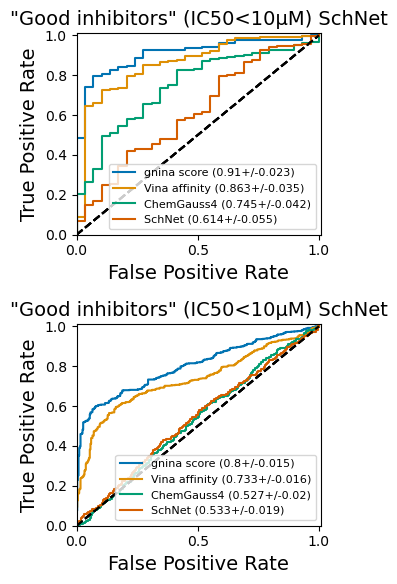

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(3.5, 6))

labels = ['gnina score', 'Vina affinity', 'ChemGauss4', 'SchNet']
cols = ['Gnina', 'AutoDock Vina', 'ChemGauss4', 'SchNet']
colors = list(sns.color_palette("colorblind"))
title = lambda x: f'"Good inhibitors" (IC50<10µM)'
for label, col, color in zip(labels, cols, colors):
    ax = get_roc_curve(axs[0], df_mers_aff_pred[col], df_mers_aff_pred['pIC50']>5, pred_type=label, title=title(30), n_bootstraps=500, color=color, box=False, legend=True)
    ax = get_roc_curve(axs[1], df_sars_aff_pred[col], df_sars_aff_pred['pIC50']>5, pred_type=label, title=title(30), n_bootstraps=500, color=color, box=False, legend=True)
axs[0].legend(loc='lower right', fontsize=8)
axs[1].legend(loc='lower right', fontsize=8)
plt.tight_layout()

### MERS-CoV results

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

We predicted 321/351 binders from experiment, out of which 304 are also predicted from theory


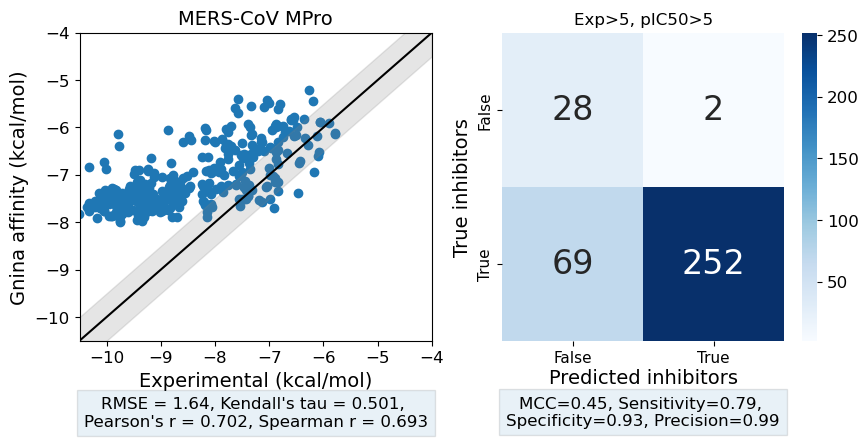

In [7]:
mers_pred_c = mers_all.copy()
mers_pred_c['CNN_dock_affinity'] = mers_pred_c['CNN_dock_affinity'].apply(lambda x: -x if x > 0 else x)
aff_df, fig, a, b = plot_affinity_compare(mers_pred_c,
                                          mers_pred_c,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='MERS pIC50',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="Gnina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

AUC is 0.86, with bootstrap-sampling is 0.866+/-0.036
95% Confidence Interval: [0.78, 0.93]
We predicted 320/349 binders from experiment, out of which 304 are also predicted from theory


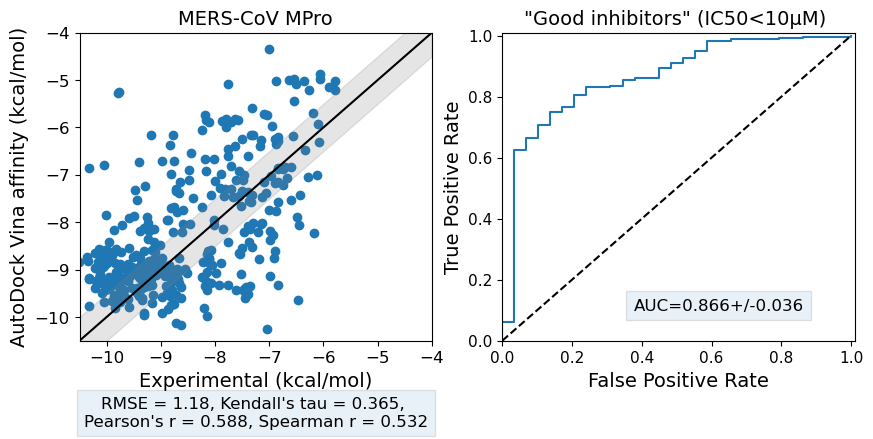

In [15]:
aff_df, fig, a, b = plot_affinity_compare(mers_pred_c,
                                          mers_pred_c,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='MERS pIC50',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

AUC is 0.91, with bootstrap-sampling is 0.909+/-0.022
95% Confidence Interval: [0.86, 0.95]
We predicted 321/351 binders from experiment, out of which 304 are also predicted from theory


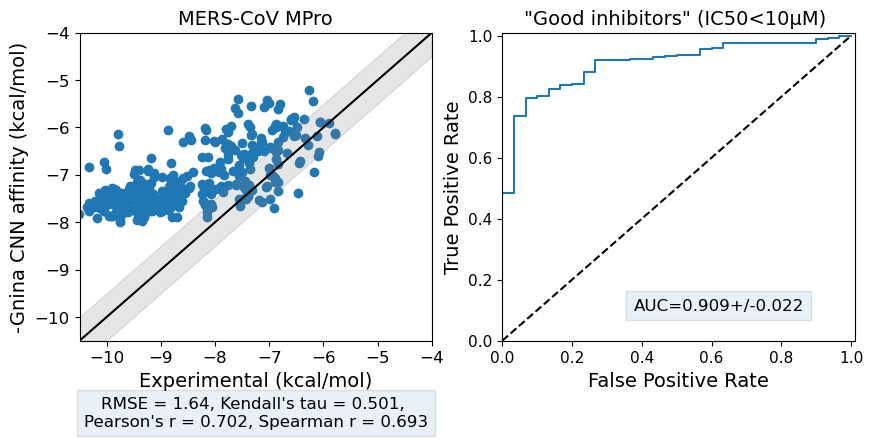

In [ ]:
mers_pred_mod = mers_all.copy()
mers_pred_mod['CNN_dock_affinity'] = mers_pred_mod['CNN_dock_affinity'].apply(lambda x: -x)
aff_df, fig, a, b = plot_affinity_compare(mers_pred_mod,
                                          mers_pred_mod,
                                          target='MERS-CoV MPro',                                        
                                          ic50_col='MERS pIC50',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

### SARS-CoV-2 results

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

We predicted 636/1002 binders from experiment, out of which 463 are also predicted from theory


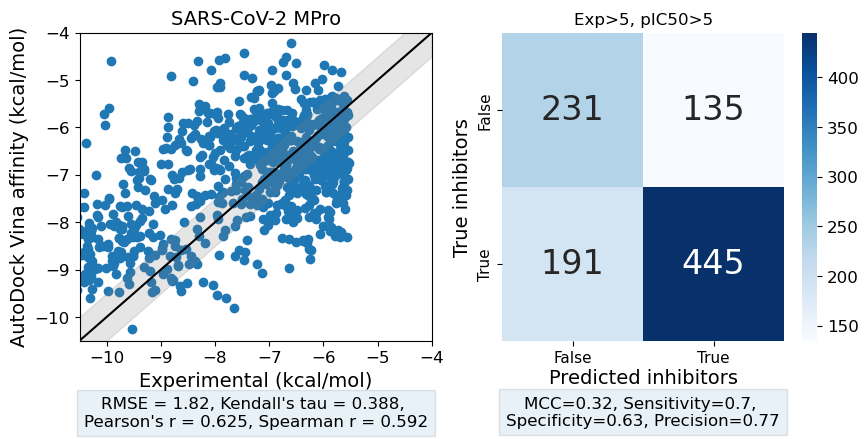

In [ ]:
aff_df, fig, a, b = plot_affinity_compare(sars_all,
                                          sars_all,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='SARS IC50 (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

AUC is 0.74, with bootstrap-sampling is 0.739+/-0.015
95% Confidence Interval: [0.71, 0.77]
We predicted 636/1002 binders from experiment, out of which 463 are also predicted from theory


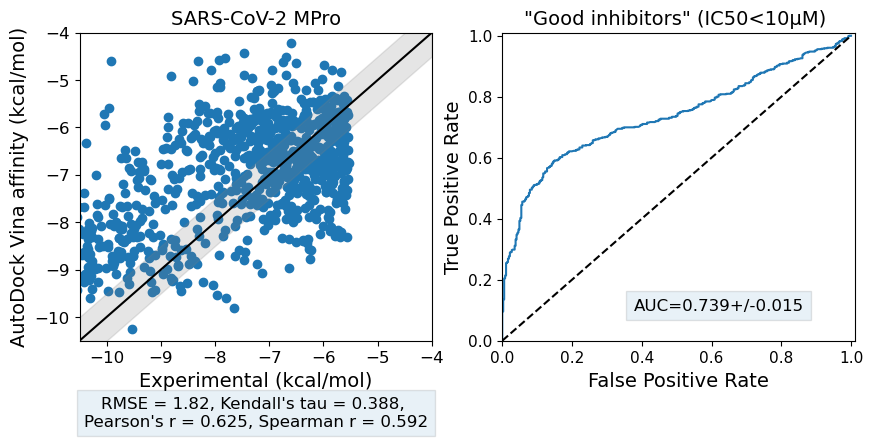

In [ ]:
sars_pred_mod = sars_all.copy()
sars_pred_mod['CNN_dock_affinity'] = sars_pred_mod['CNN_dock_affinity'].apply(lambda x: -x)
aff_df, fig, a, b = plot_affinity_compare(sars_all,
                                          sars_pred_mod,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='SARS IC50 (µM)',
                                          score_col='Vina-score-premin',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="AutoDock Vina affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='roc-curve',
                                          )

/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_sample[i] = np.random.normal(loc=y_true[j], scale=stddev_true, size=1)
/Users/castelm3/miniconda3/envs/asapdiscovery_orig/lib/python3.11/site-packages/cinnabar/stats.py:125: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and w

We predicted 638/1004 binders from experiment, out of which 490 are also predicted from theory


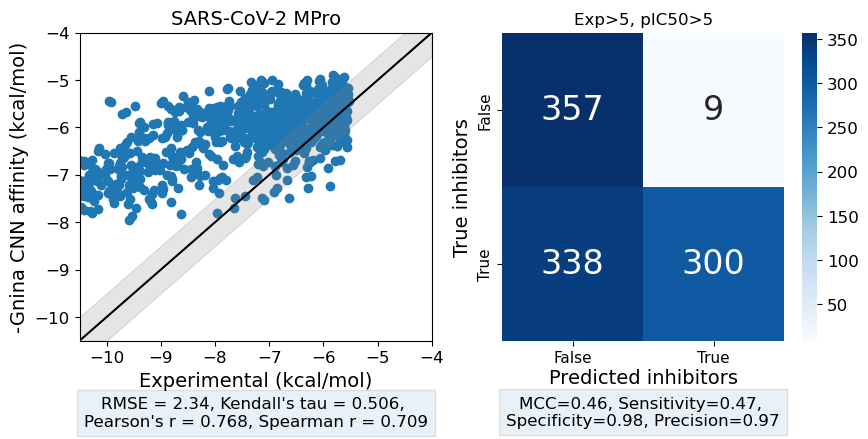

In [ ]:
aff_df, fig, a, b = plot_affinity_compare(sars_all,
                                          sars_pred_mod,
                                          target='SARS-CoV-2 MPro',                                        
                                          ic50_col='SARS IC50 (µM)',
                                          score_col='CNN_dock_affinity',
                                          binder_cond=5,
                                          prange=[-10.5,-4.],
                                          yaxis="-Gnina CNN affinity (kcal/mol)",
                                          label_pad=-12.3,
                                          classif_plot='conf-matrix',
                                          )

### RMSD plots

In [20]:
from pathlib import Path
sars_rmsd = pd.read_csv("data/sars_rmsd.csv")
mers_rmsd = pd.read_csv("data/mers_rmsd.csv")

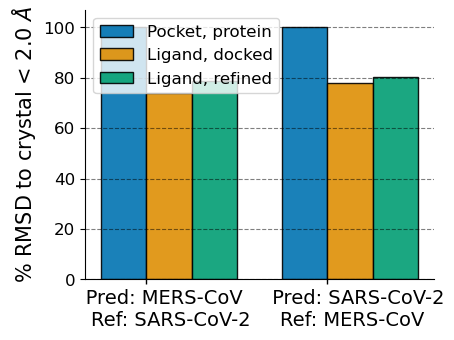

In [21]:
from scripts.plot_results import plot_RMSD
rmsd_dict = {
    "Pocket, protein": [mers_rmsd['Bsite-RMSD_AFold'].values, sars_rmsd['Bsite-RMSD_AFold'].values],
    "Ligand, docked": [mers_rmsd['Lig-RMSD_premin'].round(1).values, sars_rmsd['Lig-RMSD_premin'].round(1).values],
    "Ligand, refined": [mers_rmsd['Lig-RMSD_min'].round(1).values, sars_rmsd['Lig-RMSD_min'].round(1).values],
}

fig = plot_RMSD(
    bar_dict = rmsd_dict,
    xlabels = ['      Pred: MERS-CoV\n        Ref: SARS-CoV-2',
                        '          Pred: SARS-CoV-2\n        Ref: MERS-CoV' ],
    ylabel=r"% RMSD to crystal < 2.0 $\AA$", 
    width = 0.25,
    grid = True,
    fsize=(4.5, 3.5),
    color_palette = "colorblind",)

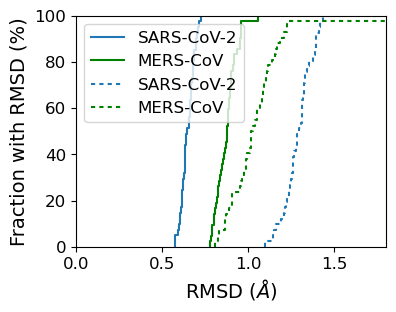

In [22]:
sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_AFold'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_AFold'] > 0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.))
sns.ecdfplot(sars_af_rmsd, x='prot-RMSD_AFold', label='SARS-CoV-2', color="tab:blue", stat='percent')
sns.ecdfplot(mers_af_rmsd, x='prot-RMSD_AFold', label='MERS-CoV', color="green", stat='percent')

sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_AFold',  label='SARS-CoV-2', color="tab:blue", stat='percent', dashes=(2, 2))
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_AFold', label='MERS-CoV', color="green", stat='percent', dashes=(2, 2))

ax.set_xlabel(r'RMSD ($\AA$)', fontsize=14)
ax.set_ylabel("Fraction with RMSD (%)", fontsize=14)
ax.set_xlim(0., 1.8)
ax.set_ylim(0., 100)
ax.legend(loc="best")

ax.axvline(x = 2.0, color = 'r', ls='--', lw=0.7, dashes=[4, 2])

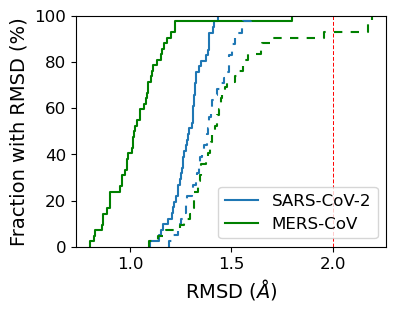

In [23]:
sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_AFold'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_AFold'] > 0]

sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_min'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_min'] > 0]

sars_af_rmsd = sars_rmsd[sars_rmsd['Bsite-RMSD_premin'] > 0]
mers_af_rmsd = mers_rmsd[mers_rmsd['Bsite-RMSD_premin'] > 0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3.))
sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_AFold', label='SARS-CoV-2', color="tab:blue", stat='percent')
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_AFold', label='MERS-CoV', color="green", stat='percent')

sns.ecdfplot(sars_af_rmsd, x='Bsite-RMSD_min', color="tab:blue", stat='percent', dashes=(4, 4))
sns.ecdfplot(mers_af_rmsd, x='Bsite-RMSD_min', color="green", stat='percent', dashes=(4, 4))

ax.set_xlabel(r'RMSD ($\AA$)', fontsize=14)
ax.set_ylabel("Fraction with RMSD (%)", fontsize=14)
ax.set_ylim(0., 100)
ax.legend(loc="best")

ax.axvline(x = 2.0, color = 'r', ls='--', lw=0.7, dashes=[4, 2])